<a href="https://colab.research.google.com/github/Anjum-Ul-Muqset/Thesis/blob/main/Copy_of_testing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tabulate

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.random_projection import SparseRandomProjection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import BernoulliRBM
from keras.layers import Input, Dense, GaussianNoise
from keras import regularizers
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
bc_tcga = pd.read_csv('main_BC-TCGA.csv')
#gse2034 = pd.read_csv('main_GSE2034.csv')
gse25066 = pd.read_csv('main_GSE25066.csv')
#simulation_data = pd.read_csv('main_SimulationData.csv')

In [ ]:
bc_tcga

,Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,tumor
0,TCGA-BH-A18G-01A-11R-A12D-07,-0.044667,1.58625,1.173625,-1.03550,0.916833,1.41375,0.212833,0.58575,-1.684250,...,-0.10875,-1.224667,-0.0885,0.5070,0.85350,-1.3730,0.3962,-0.4240,0.0243,yes
1,TCGA-BH-A0W4-01A-11R-A109-07,-0.137917,1.36775,0.895125,0.62125,1.187167,-2.05125,0.024500,0.17525,0.820625,...,-0.52725,-0.833167,-0.1785,0.4005,2.06000,1.6608,-0.0323,1.2510,-0.7398,yes
2,TCGA-BH-A18V-01A-11R-A12D-07,0.023583,0.14875,-0.289250,-0.11675,-0.018000,-2.03175,-1.488167,0.52325,-1.977500,...,-0.22275,-0.835167,0.8030,0.2495,0.77775,-1.9864,0.7179,-0.6990,1.2695,yes
3,TCGA-B6-A0RL-01A-11R-A084-07,1.239083,0.62400,-0.081000,0.37275,-2.251000,-1.79325,0.519333,-0.55300,-2.509625,...,-0.67350,-0.320000,-0.1229,0.3765,0.75275,0.7103,0.2939,-0.5540,-2.1516,yes
4,TCGA-AN-A0G0-01A-11R-A034-07,-0.555000,0.21750,0.427375,-1.02450,-0.078167,0.58150,-0.814833,-1.13675,-1.725875,...,-0.24900,-0.888667,-0.1474,-1.2875,1.54650,-0.7280,0.0917,-0.7830,2.3209,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,TCGA-A8-A06R-01A-11R-A00Z-07,0.272750,1.50300,0.029625,0.03150,1.303833,-2.57325,-0.148333,-0.55825,0.079250,...,0.00150,-0.365333,1.1907,1.1155,1.44925,1.4244,-0.5550,-0.9630,-0.2038,yes
586,TCGA-AN-A049-01A-21R-A00Z-07,0.007333,0.87425,0.131750,0.36100,0.610000,-1.65375,-0.400500,0.30425,0.011125,...,-0.14975,-0.884833,0.3503,1.5300,1.74325,3.3503,0.4685,0.1615,-0.1895,yes
587,TCGA-A2-A0YM-01A-11R-A109-07,-0.417000,-0.15175,-0.047125,0.26750,-0.101333,-0.69625,-1.234167,-0.17725,-1.714875,...,0.00975,-1.400667,0.0426,-0.2475,0.62350,-2.5507,-0.3946,-0.2035,0.3814,yes
588,TCGA-A2-A0CV-01A-31R-A115-07,0.023250,1.07750,0.771125,-0.23325,1.112833,-1.60500,-0.326333,0.02700,-0.354625,...,-0.08200,-1.373167,-0.0637,-0.4740,2.25300,1.9935,0.0378,-0.9835,-0.7580,yes


In [ ]:
gse2034

,Hybridization REF,2,9,10,12,13,14,15,16,18,...,100133941,100134017,100134018,100134128,100134401,100134498,100134713,100169750,100170939,tumor
0,GSM36815,4.868683,4.729869,-2.022420,6.073213,-1.065191,2.058995,-5.272892,2.511478,1.321999,...,4.921560,-1.569691,-3.540293,-5.246302,2.705088,-2.510515,-1.407916,-0.054751,1.658312,no
1,GSM37024,3.981340,2.787439,-2.418753,5.240463,-3.178167,2.018753,-4.528692,3.231576,2.301046,...,5.081178,-3.735345,-1.821119,-3.459267,2.383726,-1.374577,-1.201524,0.863212,0.188210,yes
2,GSM36824,4.748440,1.071601,-2.979184,5.673549,-2.668939,1.046512,-3.884347,3.259259,-1.669354,...,4.724423,-2.418554,-1.066980,-3.771844,2.026606,-2.947709,-4.204854,0.043207,-0.780214,yes
3,GSM36916,5.213649,6.531368,-1.484088,5.528525,-0.119553,1.211062,-2.650224,2.498515,0.985961,...,3.648102,-1.735251,-0.174616,-5.028710,3.162811,-3.728794,-3.105153,0.213745,1.228159,yes
4,GSM36942,4.103230,5.309710,-2.393801,4.452419,-3.168495,0.831710,-5.203941,2.431216,-0.574499,...,4.970739,-3.747161,0.014701,-5.005308,1.211232,-2.934557,-1.854859,0.577654,0.805089,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,GSM36883,4.514666,3.147038,-1.932707,2.084645,-3.999147,1.697006,-3.684319,3.293516,-0.095889,...,5.193184,-1.522967,-0.629391,-3.583914,3.918988,-2.129693,-2.416220,1.170936,1.510979,yes
282,GSM36998,4.176522,3.991476,-2.896704,4.653334,-3.429073,1.818125,-4.672366,2.511690,0.181838,...,4.593841,-3.373162,-1.396359,-5.189068,2.812273,-3.690836,-1.227528,0.017149,0.559852,no
283,GSM37058,4.834182,3.472645,-3.479302,4.730419,-0.736423,2.060263,-6.005868,2.758732,0.236332,...,3.913511,-1.958400,-1.074511,-4.571619,1.070229,-0.696639,-0.992212,-0.312738,0.111942,no
284,GSM37033,4.884936,4.725590,-2.289928,5.777950,-1.379017,2.145794,-4.683953,3.123524,1.183775,...,5.020933,-3.923639,-0.500755,-4.661862,2.749618,-0.776941,-1.368773,1.192860,-0.748358,yes


In [ ]:
gse25066

,Hybridization REF,2,9,10,12,13,14,15,16,18,...,100133941,100134017,100134018,100134128,100134401,100134498,100134713,100169750,100170939,tumor
0,patient-375,10.073348,8.508736,5.878465,12.424395,5.349684,10.949983,6.747154,11.890096,4.114624,...,13.527530,3.216416,8.947426,8.052683,8.450992,4.521209,5.824795,10.034103,8.275106,no
1,patient-299,13.066024,8.190192,4.848983,13.865238,6.902157,10.523864,4.468176,11.413596,6.169364,...,13.566692,4.332046,7.947097,7.679645,8.467705,5.167429,7.607104,8.042208,7.716433,no
2,patient-211,12.553012,13.122928,7.929091,12.630402,5.547974,9.652257,3.215322,10.730265,8.646371,...,12.547969,5.089402,7.580988,6.720163,11.498598,4.944025,6.877119,11.142393,9.575057,yes
3,patient-227,10.987345,8.675896,7.000146,13.022349,5.127136,9.544557,4.751135,11.879960,7.500914,...,12.043858,3.853835,6.681887,8.326937,7.977532,4.767909,6.847307,9.483148,7.757869,yes
4,patient-319,10.625696,8.420795,6.437226,10.120195,5.435246,10.095071,3.650671,10.838635,6.729194,...,13.501062,7.260081,8.380577,8.373385,9.036594,4.649962,7.749561,7.939991,7.215405,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,patient-8,12.869975,12.027260,6.851911,14.864565,5.988840,10.161955,3.458219,11.278683,8.836395,...,12.455552,6.313323,6.681887,9.319388,12.159520,5.065283,6.933924,10.122212,11.916959,yes
488,patient-209,8.698689,14.258542,6.611891,15.240524,5.236846,9.971793,3.903771,11.255052,8.042915,...,11.728910,2.371615,5.873002,8.644851,9.388968,5.299665,7.042471,10.145292,7.964932,yes
489,patient-307,9.056092,13.350490,5.308508,12.828324,4.771257,9.864336,4.176324,10.774929,10.522097,...,14.319825,5.405652,8.059927,6.470535,10.176548,5.436415,5.282031,8.523463,9.814512,yes
490,patient-423,9.827644,9.630964,7.328680,15.060735,7.904826,11.221701,3.678551,12.141157,9.621856,...,13.372950,3.092043,8.407576,11.605410,10.512789,7.513558,7.840592,11.411264,8.442295,yes


# **BCTCGA**

# **DATA PREPROCESS**

## **Replacing NAN values & Precessing by Z scores**

In [ ]:
# Drop unnecessary columns
bc_tcga_data = bc_tcga.drop(columns=['Hybridization REF', 'tumor'])

# Separate the data into tumor and non-tumor groups
tumor_data = bc_tcga_data[bc_tcga['tumor'] == 'yes']
normal_data = bc_tcga_data[bc_tcga['tumor'] == 'no']

# Calculate mean values for each group
tumor_mean = tumor_data.mean()
normal_mean = normal_data.mean()

# Fill missing values with mean values
bc_tcga_data_tumor_filled = tumor_data.fillna(tumor_mean)
bc_tcga_data_normal_filled = normal_data.fillna(normal_mean)

# Concatenate the filled data back together
bc_tcga_data_filled = pd.concat([bc_tcga_data_tumor_filled, bc_tcga_data_normal_filled])

# Get the 'Hybridization REF' column
hybridization_ref = bc_tcga['Hybridization REF']

# Add 'Hybridization REF' and 'tumor' columns back
bc_tcga_data_filled = pd.concat([hybridization_ref, bc_tcga_data_filled, bc_tcga['tumor']], axis=1)

# Save the preprocessed data
bc_tcga_data_filled.to_csv('Preprocessed_BC-TCGA_Filled.csv', index=False)

# Apply Z-score normalization
data_values = bc_tcga_data_filled.iloc[:, 1:-1].values
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_values)

# Create a DataFrame with the normalized values
bc_tcga_normalized = pd.DataFrame(data=normalized_data, columns=bc_tcga_data_filled.columns[1:-1])

# Add 'Hybridization REF' and 'tumor' columns back
bc_tcga_normalized = pd.concat([hybridization_ref, bc_tcga_normalized, bc_tcga['tumor']], axis=1)

# Save the preprocessed data
bc_tcga_normalized.to_csv('Preprocessed_BC-TCGA_Normalized.csv', index=False)



In [ ]:
bc_tcga_normalized

,Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,tumor
0,TCGA-BH-A18G-01A-11R-A12D-07,-0.547600,0.906749,1.403060,-1.773362,0.556704,2.725784,0.870378,1.028592,-1.137918,...,0.396418,-0.795587,-0.606984,0.238249,-1.791841,-1.096140,0.820977,-0.366910,0.279191,yes
1,TCGA-BH-A0W4-01A-11R-A109-07,-0.715430,0.643555,0.861072,0.924985,0.836514,-0.483018,0.471868,0.197657,1.087801,...,-0.833246,-0.343399,-0.773477,0.082911,-0.030930,0.593229,-0.145045,0.752569,-0.622907,yes
2,TCGA-BH-A18V-01A-11R-A12D-07,-0.424765,-0.824785,-1.443837,-0.276995,-0.410898,-0.464960,-2.728912,0.902079,-1.398486,...,0.061456,-0.345709,1.042230,-0.137332,-1.902400,-1.437711,1.546226,-0.550705,1.749275,yes
3,TCGA-B6-A0RL-01A-11R-A084-07,1.762871,-0.252325,-1.038562,0.520254,-2.722173,-0.244094,1.518927,-1.276467,-1.871309,...,-1.262968,0.249316,-0.670621,0.047906,-1.938888,0.063944,0.590349,-0.453795,-2.289679,yes
4,TCGA-AN-A0G0-01A-11R-A034-07,-1.466090,-0.741973,-0.049215,-1.755447,-0.473174,1.955070,-1.304149,-2.458095,-1.174904,...,-0.015674,-0.407502,-0.715945,-2.379146,-0.780394,-0.736972,0.134504,-0.606846,2.990559,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,TCGA-A8-A06R-01A-11R-A00Z-07,-2.211950,-0.582070,1.104821,0.130994,-0.477314,1.725175,-0.702504,0.297855,0.295988,...,1.996304,1.545627,-2.231408,1.006183,-1.051500,-0.002377,1.081814,1.576639,-0.310165,yes
586,TCGA-AN-A049-01A-21R-A00Z-07,-1.491437,-0.360132,2.536418,0.329289,-0.876845,0.262462,0.727549,-0.966258,0.420274,...,-0.198581,0.363662,-1.346771,-0.199321,0.175227,-0.651663,-0.441277,1.751077,-0.877798,yes
587,TCGA-A2-A0YM-01A-11R-A109-07,-2.406926,-0.958791,1.525178,-0.114532,0.073507,1.266543,0.062072,0.488636,-0.853612,...,0.980399,0.986215,-2.897383,-0.576360,1.310734,-0.946848,0.023812,2.078567,0.044251,yes
588,TCGA-A2-A0CV-01A-31R-A115-07,-0.985248,-0.616399,0.914103,0.292643,-0.374499,2.481536,-0.023273,0.385402,0.346635,...,0.460325,1.056671,-1.516780,-0.508536,1.166241,-0.075212,-0.628845,1.379143,-0.131777,yes


In [ ]:
print(bc_tcga_normalized.columns)

Index(['Hybridization REF', 'ELMO2', 'CREB3L1', 'RPS11', 'PNMA1', 'MMP2',
       'C10orf90', 'ZHX3', 'ERCC5', 'GPR98',
       ...
       'GRIP2', 'GPLD1', 'RAB8A', 'RXFP2', 'PIK3IP1', 'SLC39A6', 'SNRPD2',
       'AQP7', 'CTSC', 'tumor'],
      dtype='object', length=17816)


# **Without Dimensionality Reduction**

## **PCA**

SVM Results (Linear Kernel):
Average Accuracy: 0.9983050847457626
Average Precision: 1.0
Average Recall: 0.9980952380952381
Average F1 Score: 0.999043062200957

SVM-RBF Results:
Average Accuracy: 0.8966101694915254
Average Precision: 0.8966101694915254
Average Recall: 1.0
Average F1 Score: 0.9454836643177451

ANN Results:
Average Accuracy: 0.9898305084745763
Average Precision: 1.0
Average Recall: 0.9886253369272235
Average F1 Score: 0.9942578473796276

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



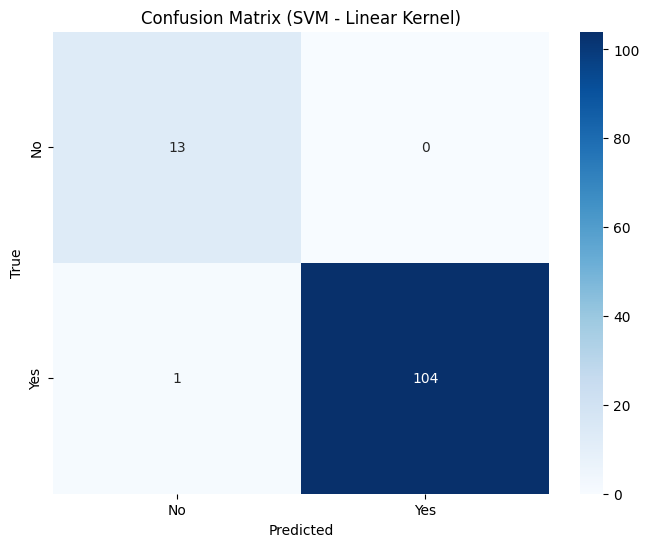


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        13
         yes       0.89      1.00      0.94       105

    accuracy                           0.89       118
   macro avg       0.44      0.50      0.47       118
weighted avg       0.79      0.89      0.84       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


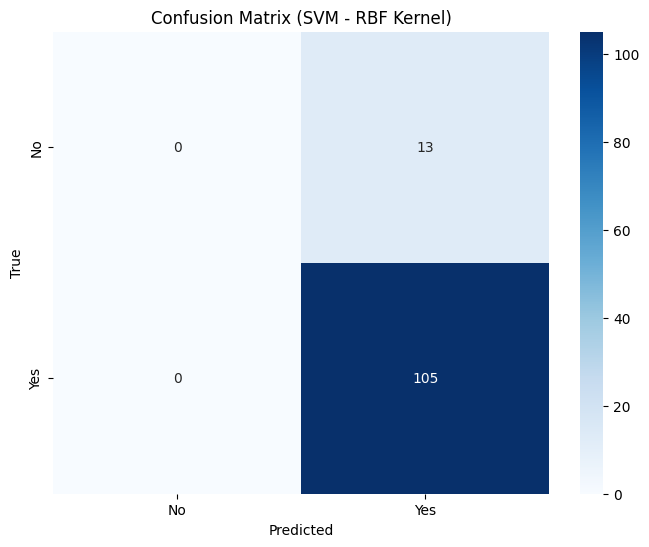


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.81      1.00      0.90        13
         yes       1.00      0.97      0.99       105

    accuracy                           0.97       118
   macro avg       0.91      0.99      0.94       118
weighted avg       0.98      0.97      0.98       118



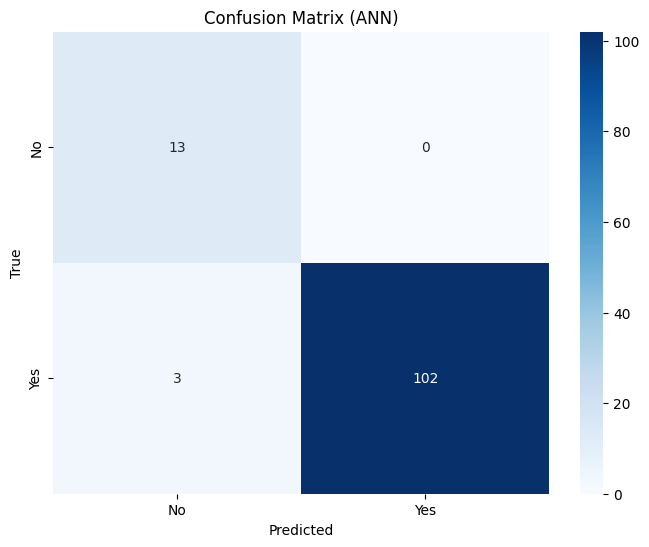

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 1000

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
pca_svm = avg_accuracy_svm
pca_svmrbf = avg_accuracy_svm_rbf
pca_ann = avg_accuracy_ann

# **PCA+SDAE**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
SVM Results (Linear Kernel):
Average Accuracy: 0.9915254237288135
Average Precision: 0.9962260792167335
Average Recall: 0.9943216531895777
Average F1 Score: 0.9952605363619315

SVM-RBF Results:
Average Accuracy: 0.8966101694915254
Average Precision: 0.8966101694915254
Average Recall: 1.0
Average F1 Score: 0.9454836643177451

ANN Results:
Average Accuracy: 0.9949152542372882
Average Precision: 0.9981308411214954
Average Recall: 0.996208445642408
Average F1 Score: 0.9971562277662285

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.92      0.92      0.92        13
         yes       0.99      0.99      0.99       105

    accuracy                           0.98       118
   macro avg       0.96      0.96      0.96       118
weighted avg       0.98      0.98      0.98       118



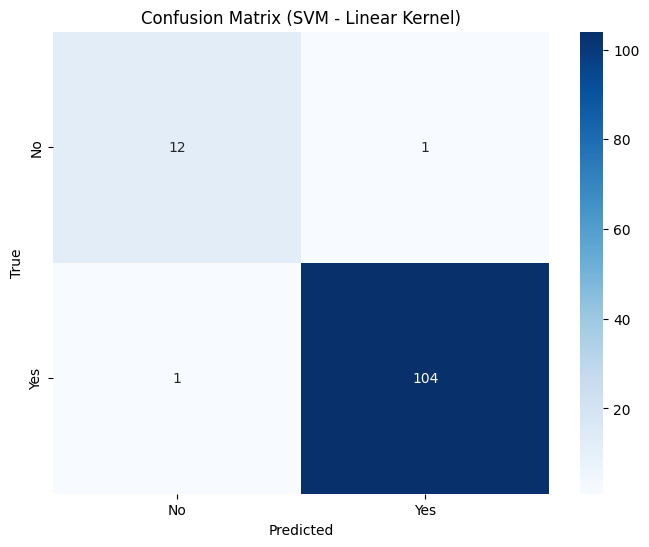


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        13
         yes       0.89      1.00      0.94       105

    accuracy                           0.89       118
   macro avg       0.44      0.50      0.47       118
weighted avg       0.79      0.89      0.84       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


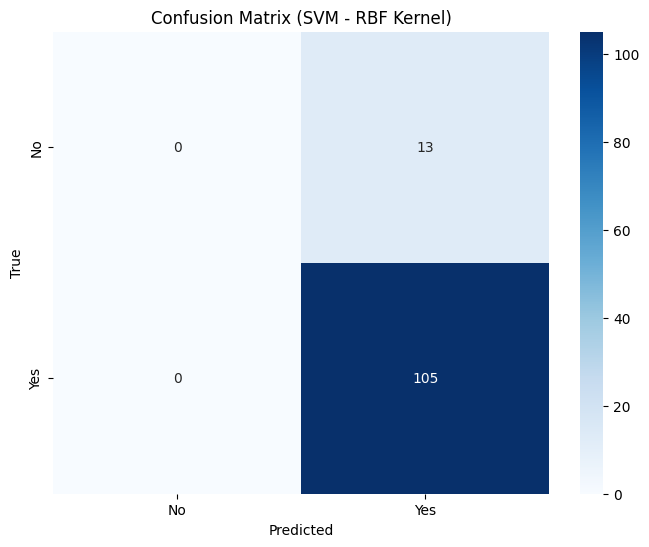


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



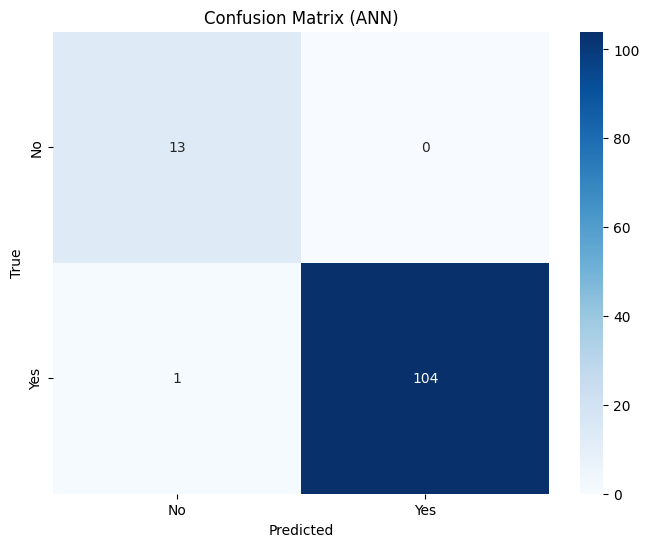

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, GaussianNoise
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 1000

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Standardize the features before feeding into the SDAE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train SDAE
sdae = Sequential()
sdae.add(GaussianNoise(0.1, input_shape=(X_scaled.shape[1],)))  # Add Gaussian noise to input
sdae.add(Dense(200, activation='relu'))
sdae.add(GaussianNoise(0.1))
sdae.add(Dense(100, activation='relu'))
sdae.add(Dense(X_scaled.shape[1], activation='linear'))  # Reconstruct to original dimensions

sdae.compile(optimizer='adam', loss='mean_squared_error')

# Train SDAE
sdae.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Transform the input data using the trained SDAE
X_sdae = sdae.predict(X_scaled)

# Perform cross-validation
for train_index, test_index in kf.split(X_sdae, y):
    X_train, X_test = X_sdae[train_index], X_sdae[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
pcasdae_svm = avg_accuracy_svm
pcasdae_svmrbf = avg_accuracy_svm_rbf
pcasdae_ann = avg_accuracy_ann

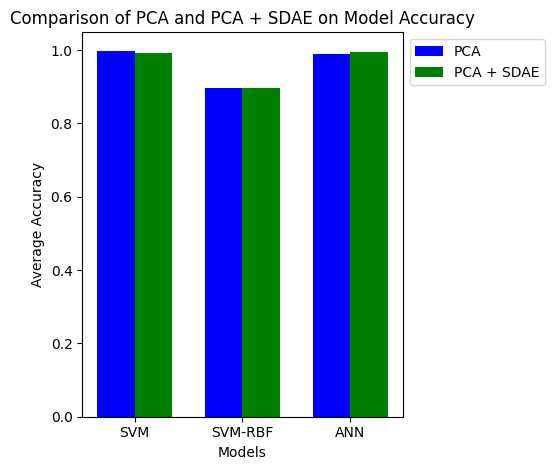

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: accuracy values for PCA and PCA+SDAE for SVM, SVM-RBF, and ANN
pca_svm = avg_accuracy_svm
pca_svmrbf = avg_accuracy_svm_rbf
pca_ann = avg_accuracy_ann

pcasdae_svm = pcasdae_svm
pcasdae_svmrbf = pcasdae_svmrbf
pcasdae_ann = pcasdae_ann

# Labels for models
models = ['SVM', 'SVM-RBF', 'ANN']

# Accuracy values for PCA and PCA+SDAE
pca_accuracies = [pca_svm, pca_svmrbf, pca_ann]
pcasdae_accuracies = [pcasdae_svm, pcasdae_svmrbf, pcasdae_ann]

# Create bar width and position
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots()

bar1 = ax.bar(index, pca_accuracies, bar_width, label='PCA', color='b')
bar2 = ax.bar(index + bar_width, pcasdae_accuracies, bar_width, label='PCA + SDAE', color='g')

# Add labels, title, and ticks
ax.set_xlabel('Models')
ax.set_ylabel('Average Accuracy')
ax.set_title('Comparison of PCA and PCA + SDAE on Model Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to fit the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


## **KPCA**

SVM Results (Linear Kernel):
Average Accuracy: 0.9932203389830508
Average Precision: 0.9962962962962962
Average Recall: 0.996208445642408
Average F1 Score: 0.996226036023874

SVM-RBF Results:
Average Accuracy: 0.8966101694915254
Average Precision: 0.8966101694915254
Average Recall: 1.0
Average F1 Score: 0.9454836643177451

ANN Results:
Average Accuracy: 0.9898305084745763
Average Precision: 0.9907234337140878
Average Recall: 0.9980952380952381
Average F1 Score: 0.9943657773077973

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



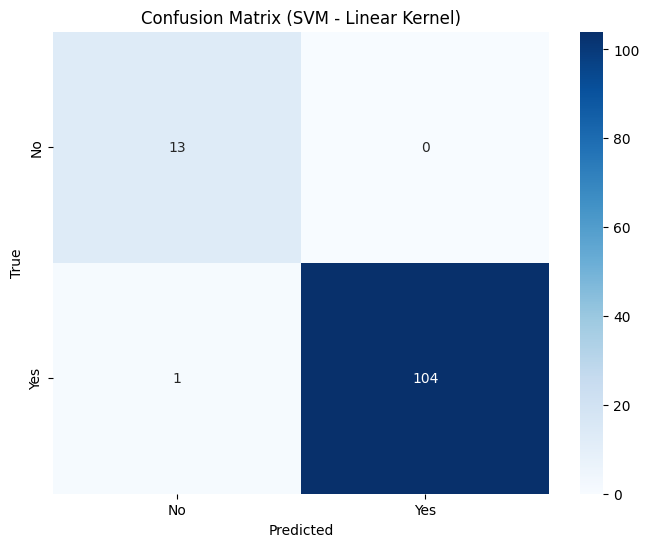


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        13
         yes       0.89      1.00      0.94       105

    accuracy                           0.89       118
   macro avg       0.44      0.50      0.47       118
weighted avg       0.79      0.89      0.84       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


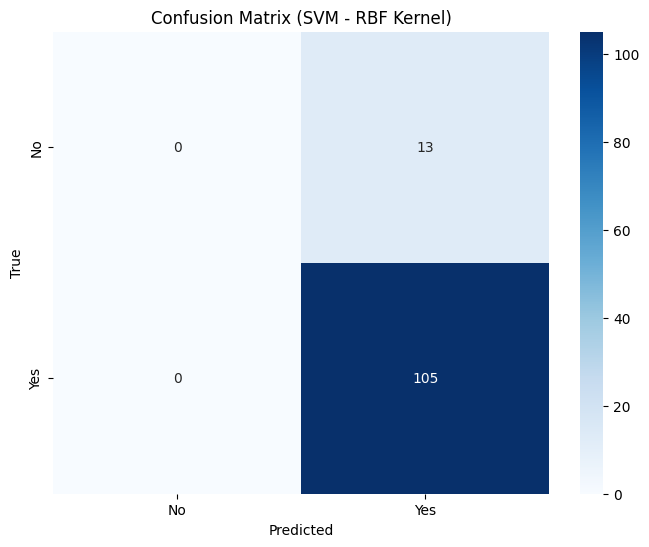


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



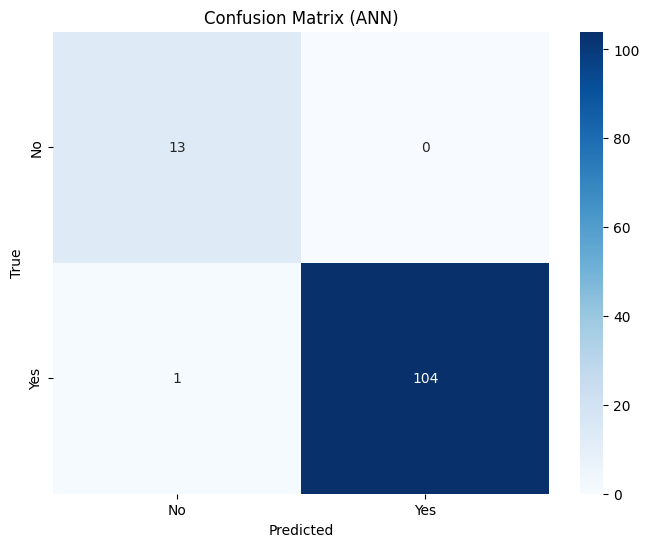

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set KPCA dimension
dim = 1000

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply KPCA
    kpca = KernelPCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]), kernel='rbf')  # Using RBF kernel for KPCA
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_kpca, y_train)
    predictions_svm = svm.predict(X_test_kpca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_kpca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_kpca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_kpca, y_train)
    predictions_ann = ann.predict(X_test_kpca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
kpca_svm = avg_accuracy_svm
kpca_svmrbf = avg_accuracy_svm_rbf
kpca_ann = avg_accuracy_ann

# **KPCA+SDAE**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
SVM Results (Linear Kernel):
Average Accuracy: 0.9932203389830508
Average Precision: 0.9962962962962962
Average Recall: 0.996208445642408
Average F1 Score: 0.996226036023874

SVM-RBF Results:
Average Accuracy: 0.8966101694915254
Average Precision: 0.8966101694915254
Average Recall: 1.0
Average F1 Score: 0.9454836643177451

ANN Results:
Average Accuracy: 0.9949152542372882
Average Precision: 0.9962962962962962
Average Recall: 0.9980952380952381
Average F1 Score: 0.9971739033224523

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



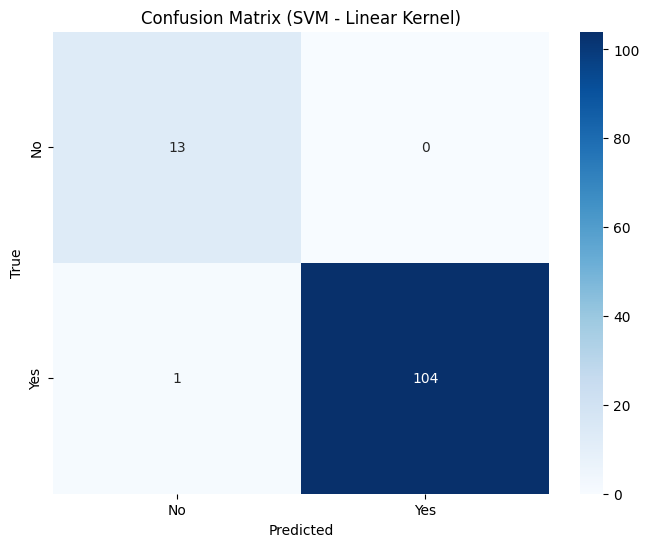


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        13
         yes       0.89      1.00      0.94       105

    accuracy                           0.89       118
   macro avg       0.44      0.50      0.47       118
weighted avg       0.79      0.89      0.84       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


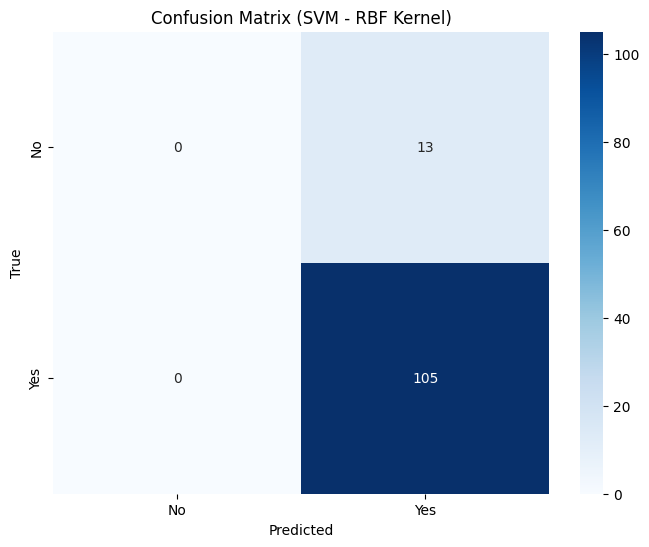


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



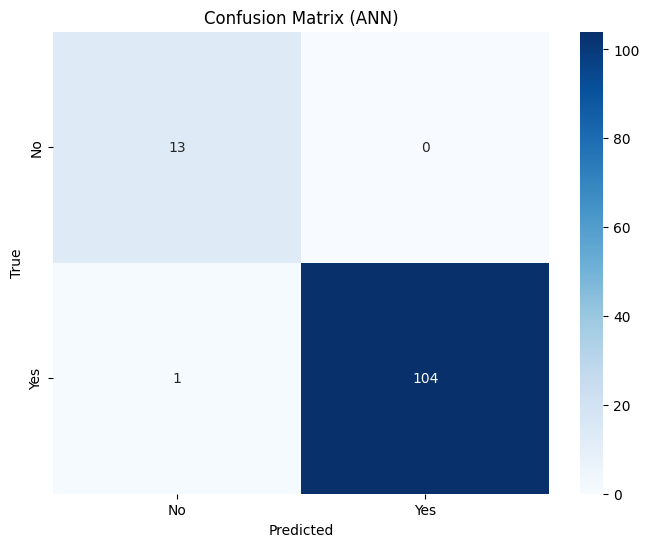

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, GaussianNoise
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set KPCA dimension
dim = 1000

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Standardize the features before feeding into the SDAE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train SDAE
sdae = Sequential()
sdae.add(GaussianNoise(0.1, input_shape=(X_scaled.shape[1],)))  # Add Gaussian noise to input
sdae.add(Dense(200, activation='relu'))
sdae.add(GaussianNoise(0.1))
sdae.add(Dense(100, activation='relu'))
sdae.add(Dense(X_scaled.shape[1], activation='linear'))  # Reconstruct to original dimensions

sdae.compile(optimizer='adam', loss='mean_squared_error')

# Train SDAE
sdae.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Transform the input data using the trained SDAE
X_sdae = sdae.predict(X_scaled)

# Perform cross-validation
for train_index, test_index in kf.split(X_sdae, y):
    X_train, X_test = X_sdae[train_index], X_sdae[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Kernel PCA
    kpca = KernelPCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]), kernel='rbf')  # Using RBF kernel
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_kpca, y_train)
    predictions_svm = svm.predict(X_test_kpca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_kpca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_kpca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_kpca, y_train)
    predictions_ann = ann.predict(X_test_kpca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
kpcasdae_svm = avg_accuracy_svm
kpcasdae_svmrbf = avg_accuracy_svm_rbf
kpcasdae_ann = avg_accuracy_ann

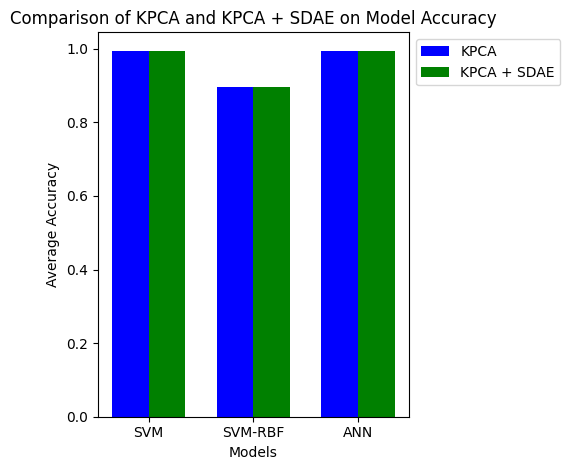

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: accuracy values for KPCA and KPCA+SDAE for SVM, SVM-RBF, and ANN
kpca_svm = avg_accuracy_svm  # Replace with actual accuracy value
kpca_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
kpca_ann = avg_accuracy_ann  # Replace with actual accuracy value

kpcasdae_svm = avg_accuracy_svm  # Replace with actual accuracy value
kpcasdae_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
kpcasdae_ann = avg_accuracy_ann  # Replace with actual accuracy value

# Labels for models
models = ['SVM', 'SVM-RBF', 'ANN']

# Accuracy values for KPCA and KPCA+SDAE
kpca_accuracies = [kpca_svm, kpca_svmrbf, kpca_ann]
kpcasdae_accuracies = [kpcasdae_svm, kpcasdae_svmrbf, kpcasdae_ann]

# Create bar width and position
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots()

bar1 = ax.bar(index, kpca_accuracies, bar_width, label='KPCA', color='b')
bar2 = ax.bar(index + bar_width, kpcasdae_accuracies, bar_width, label='KPCA + SDAE', color='g')

# Add labels, title, and ticks
ax.set_xlabel('Models')
ax.set_ylabel('Average Accuracy')
ax.set_title('Comparison of KPCA and KPCA + SDAE on Model Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to fit the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


# **FS**

SVM Results (Linear Kernel):
Average Accuracy: 0.9932203389830508
Average Precision: 0.9962962962962962
Average Recall: 0.996208445642408
Average F1 Score: 0.996226036023874

SVM-RBF Results:
Average Accuracy: 0.9932203389830508
Average Precision: 0.9962962962962962
Average Recall: 0.996208445642408
Average F1 Score: 0.996226036023874

ANN Results:
Average Accuracy: 0.9949152542372881
Average Precision: 1.0
Average Recall: 0.9942857142857143
Average F1 Score: 0.9971014492753623

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



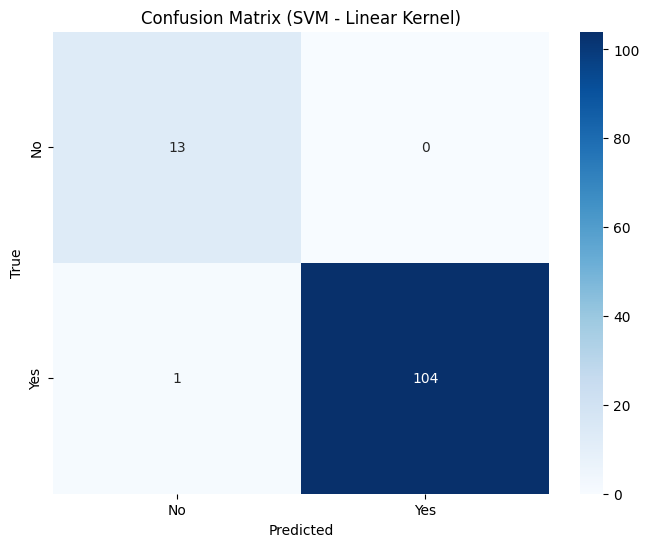


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



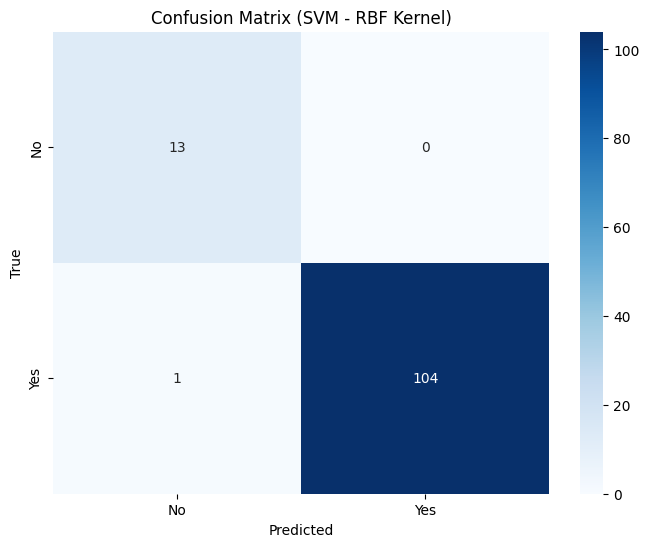


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.81      1.00      0.90        13
         yes       1.00      0.97      0.99       105

    accuracy                           0.97       118
   macro avg       0.91      0.99      0.94       118
weighted avg       0.98      0.97      0.98       118



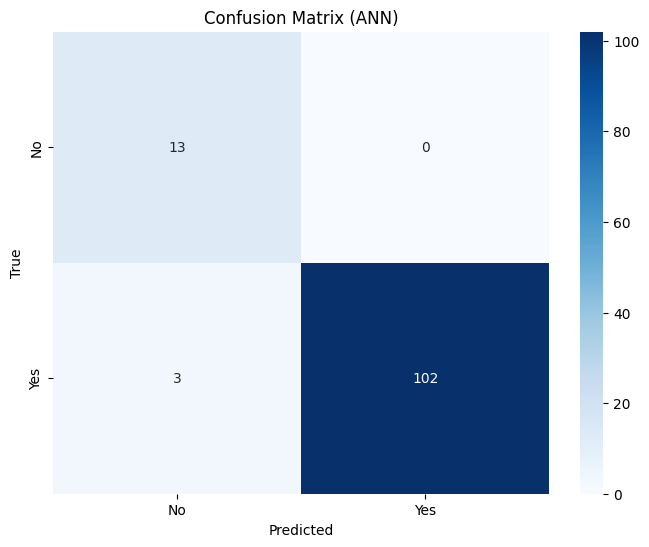

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set the number of top features to select
n_features_to_select = 1000  # Adjust as needed

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Feature Selection
    selector = SelectKBest(score_func=f_classif, k=n_features_to_select)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_selected, y_train)
    predictions_svm = svm.predict(X_test_selected)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_selected, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_selected)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_selected, y_train)
    predictions_ann = ann.predict(X_test_selected)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
fs_svm = avg_accuracy_svm
fs_svmrbf = avg_accuracy_svm_rbf
fs_ann = avg_accuracy_ann

# **FS+SDAE**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
SVM Results (Linear Kernel):
Average Accuracy: 0.9932203389830508
Average Precision: 0.9981308411214954
Average Recall: 0.9943216531895777
Average F1 Score: 0.9961993331600448

SVM-RBF Results:
Average Accuracy: 0.9949152542372882
Average Precision: 0.9981308411214954
Average Recall: 0.996208445642408
Average F1 Score: 0.9971562277662285

ANN Results:
Average Accuracy: 0.9949152542372882
Average Precision: 1.0
Average Recall: 0.9943036837376459
Average F1 Score: 0.9971290557783448

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



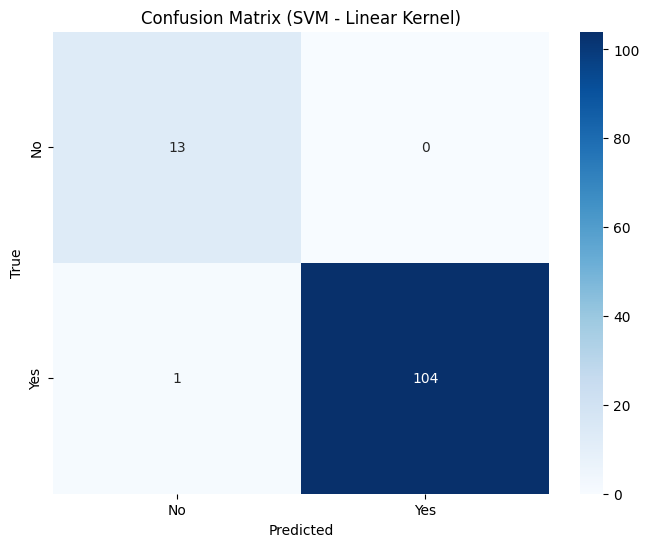


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.93      1.00      0.96        13
         yes       1.00      0.99      1.00       105

    accuracy                           0.99       118
   macro avg       0.96      1.00      0.98       118
weighted avg       0.99      0.99      0.99       118



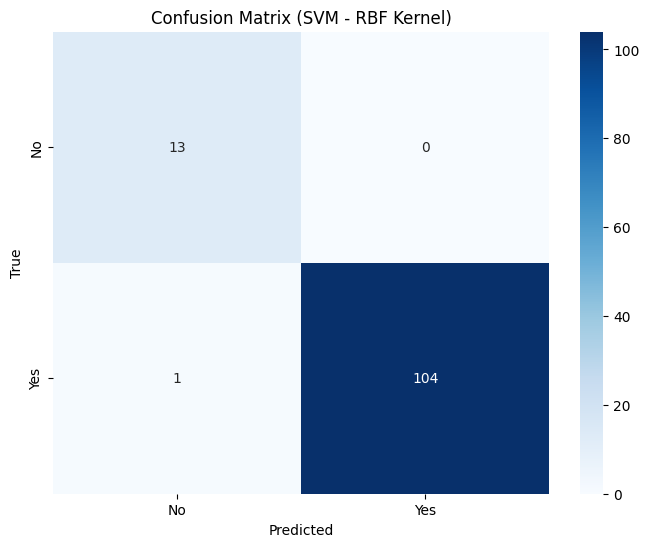


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.87      1.00      0.93        13
         yes       1.00      0.98      0.99       105

    accuracy                           0.98       118
   macro avg       0.93      0.99      0.96       118
weighted avg       0.99      0.98      0.98       118



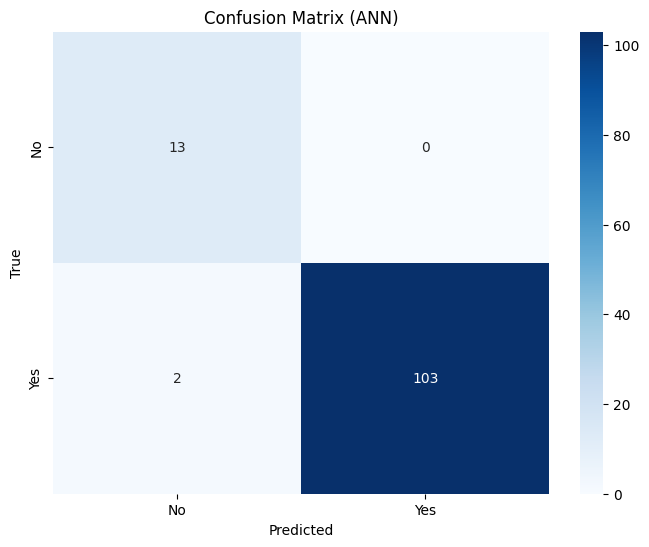

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif  # Import SelectKBest for feature selection
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, GaussianNoise
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set number of features to select
n_features_to_select = 1000  # Set this to the desired number of features

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Standardize the features before feeding into the SDAE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train SDAE
sdae = Sequential()
sdae.add(GaussianNoise(0.1, input_shape=(X_scaled.shape[1],)))  # Add Gaussian noise to input
sdae.add(Dense(200, activation='relu'))
sdae.add(GaussianNoise(0.1))
sdae.add(Dense(100, activation='relu'))
sdae.add(Dense(X_scaled.shape[1], activation='linear'))  # Reconstruct to original dimensions

sdae.compile(optimizer='adam', loss='mean_squared_error')

# Train SDAE
sdae.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Transform the input data using the trained SDAE
X_sdae = sdae.predict(X_scaled)

# Perform cross-validation
for train_index, test_index in kf.split(X_sdae, y):
    X_train, X_test = X_sdae[train_index], X_sdae[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply feature selection
    selector = SelectKBest(score_func=f_classif, k=n_features_to_select)  # Using ANOVA F-value as the scoring function
    X_train_fs = selector.fit_transform(X_train, y_train)
    X_test_fs = selector.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_fs, y_train)
    predictions_svm = svm.predict(X_test_fs)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_fs, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_fs)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_fs, y_train)
    predictions_ann = ann.predict(X_test_fs)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
fssdae_svm = avg_accuracy_svm
fssdae_svmrbf = avg_accuracy_svm_rbf
fssdae_ann = avg_accuracy_ann

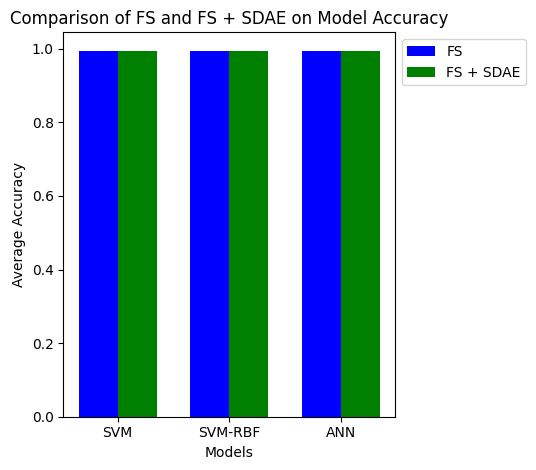

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: accuracy values for FS and FS+SDAE for SVM, SVM-RBF, and ANN
fs_svm = avg_accuracy_svm  # Replace with actual accuracy value
fs_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
fs_ann = avg_accuracy_ann  # Replace with actual accuracy value

fssdae_svm = avg_accuracy_svm  # Replace with actual accuracy value
fssdae_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
fssdae_ann = avg_accuracy_ann  # Replace with actual accuracy value

# Labels for models
models = ['SVM', 'SVM-RBF', 'ANN']

# Accuracy values for FS and FS+SDAE
fs_accuracies = [fs_svm, fs_svmrbf, fs_ann]
fssdae_accuracies = [fssdae_svm, fssdae_svmrbf, fssdae_ann]

# Create bar width and position
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots()

bar1 = ax.bar(index, fs_accuracies, bar_width, label='FS', color='b')
bar2 = ax.bar(index + bar_width, fssdae_accuracies, bar_width, label='FS + SDAE', color='g')

# Add labels, title, and ticks
ax.set_xlabel('Models')
ax.set_ylabel('Average Accuracy')
ax.set_title('Comparison of FS and FS + SDAE on Model Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to fit the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


In [ ]:
from tabulate import tabulate

# Convert accuracies to percentage
def format_percentage(accuracy):
    return f'{accuracy * 100:.2f}%'

# Define the accuracies and models
data = [
    ['PCA', format_percentage(pca_svm), format_percentage(pca_svmrbf), format_percentage(pca_ann)],
    ['KPCA', format_percentage(kpca_svm), format_percentage(kpca_svmrbf), format_percentage(kpca_ann)],
    ['RP+PCA', format_percentage(rppca_svm), format_percentage(rppca_svmrbf), format_percentage(rppca_ann)],
    ['SDAE', format_percentage(sdae_svm), format_percentage(sdae_svmrbf), format_percentage(sdae_ann)],
    ['RP+SDAE', format_percentage(rpsdae_svm), format_percentage(rpsdae_svmrbf), format_percentage(rpsdae_ann)],
    ['FS+SDAE', format_percentage(fssdae_svm), format_percentage(fssdae_svmrbf), format_percentage(fssdae_ann)]
]

headers = ['Model', 'SVM', 'SVM-RBF', 'ANN']

# Print the table
print(tabulate(data, headers=headers, tablefmt='grid'))


+---------+--------+-----------+--------+
| Model   | SVM    | SVM-RBF   | ANN    |
+=========+========+===========+========+
| PCA     | 99.83% | 89.66%    | 98.98% |
+---------+--------+-----------+--------+
| KPCA    | 99.32% | 89.66%    | 98.98% |
+---------+--------+-----------+--------+
| RP+PCA  | 99.66% | 89.66%    | 95.93% |
+---------+--------+-----------+--------+
| SDAE    | 98.81% | 98.98%    | 98.64% |
+---------+--------+-----------+--------+
| RP+SDAE | 99.66% | 89.66%    | 95.93% |
+---------+--------+-----------+--------+
| FS+SDAE | 98.98% | 99.15%    | 98.98% |
+---------+--------+-----------+--------+


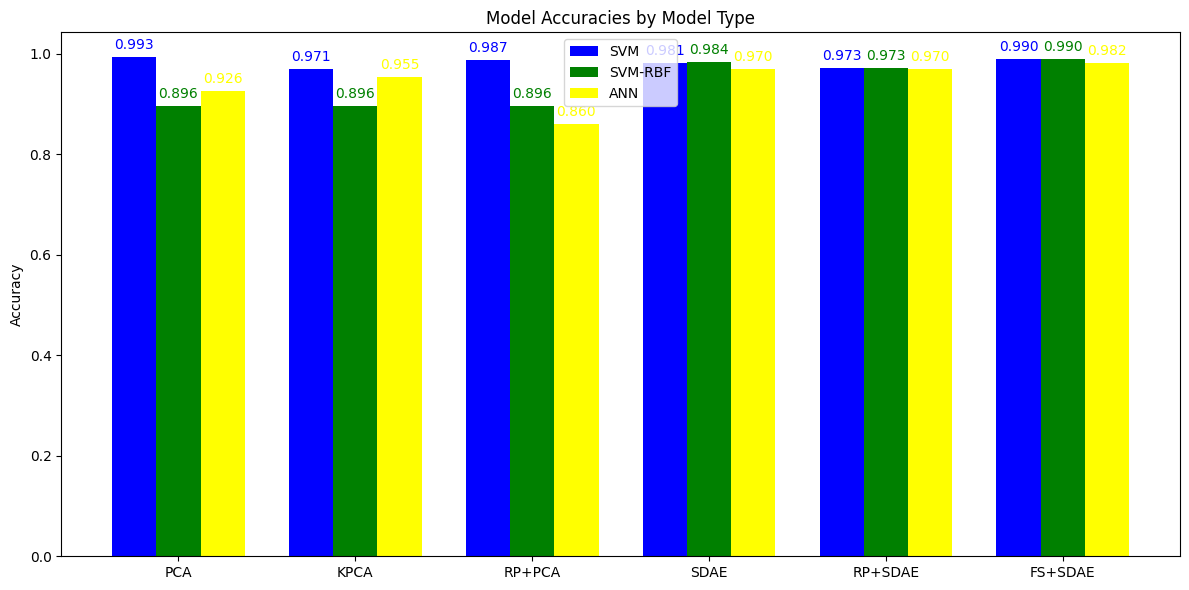

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables with accuracies
accuracies_svm = [pca_svm, kpca_svm, rppca_svm, sdae_svm, rpsdae_svm, fssdae_svm]
accuracies_svm_rbf = [pca_svmrbf, kpca_svmrbf, rppca_svmrbf, sdae_svmrbf, rpsdae_svmrbf, fssdae_svmrbf]
accuracies_ann = [pca_ann, kpca_ann, rppca_ann, sdae_ann, rpsdae_ann, fssdae_ann]

# Define the corresponding model names
models = ['PCA', 'KPCA', 'RP+PCA', 'SDAE', 'RP+SDAE', 'FS+SDAE']

# Create a bar plot with different colors for SVM, SVM-RBF, and ANN
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, accuracies_svm, bar_width, label='SVM', color='blue')
plt.bar(index, accuracies_svm_rbf, bar_width, label='SVM-RBF', color='green')
plt.bar(index + bar_width, accuracies_ann, bar_width, label='ANN', color='yellow')

plt.xticks(index, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracies by Model Type')

# Add accuracy values on top of the bars
for i, value in enumerate(accuracies_svm):
    plt.text(i - bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='blue')

for i, value in enumerate(accuracies_svm_rbf):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='green')

for i, value in enumerate(accuracies_ann):
    plt.text(i + bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='yellow')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


--------------------------------------------------------------------------------

# **GSE25066**

## **Replacing NAN values & Precessing by Z scores**

In [ ]:
# Drop unnecessary columns
gse25066_data = gse25066.drop(columns=['Hybridization REF', 'tumor'])

# Separate the data into tumor and non-tumor groups
tumor_data = gse25066_data[gse25066['tumor'] == 'yes']
normal_data = gse25066_data[gse25066['tumor'] == 'no']

# Calculate mean values for each group
tumor_mean = tumor_data.mean()
normal_mean = normal_data.mean()

# Fill missing values with mean values
gse25066_data_tumor_filled = tumor_data.fillna(tumor_mean)
gse25066_data_normal_filled = normal_data.fillna(normal_mean)

# Concatenate the filled data back together
gse25066_data_filled = pd.concat([gse25066_data_tumor_filled, gse25066_data_normal_filled])

# Get the 'Hybridization REF' column
hybridization_ref = gse25066['Hybridization REF']

# Add 'Hybridization REF' and 'tumor' columns back
gse25066_data_filled = pd.concat([hybridization_ref, gse25066_data_filled, gse25066['tumor']], axis=1)

# Save the preprocessed data
gse25066_data_filled.to_csv('Preprocessed_GSE25066_Filled.csv', index=False)

# Apply Z-score normalization
data_values = gse25066_data_filled.iloc[:, 1:-1].values
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_values)

# Create a DataFrame with the normalized values
gse25066_normalized = pd.DataFrame(data=normalized_data, columns=gse25066_data_filled.columns[1:-1])

# Add 'Hybridization REF' and 'tumor' columns back
gse25066_normalized = pd.concat([hybridization_ref, gse25066_normalized, gse25066['tumor']], axis=1)

# Save the preprocessed data
gse25066_normalized.to_csv('Preprocessed_GSE25066_Normalized.csv', index=False)


# **PCA**

SVM Results (Linear Kernel):
Average Accuracy: 0.7987219130076273
Average Precision: 0.8324209276332575
Average Recall: 0.936222005842259
Average F1 Score: 0.8811667464869256

SVM-RBF Results:
Average Accuracy: 0.7967429396000826
Average Precision: 0.7967429396000826
Average Recall: 1.0
Average F1 Score: 0.8868743615934627

ANN Results:
Average Accuracy: 0.7499484642341786
Average Precision: 0.834670991288123
Average Recall: 0.8569620253164556
Average F1 Score: 0.8446625905319634

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.50      0.30      0.38        20
         yes       0.84      0.92      0.88        78

    accuracy                           0.80        98
   macro avg       0.67      0.61      0.63        98
weighted avg       0.77      0.80      0.78        98



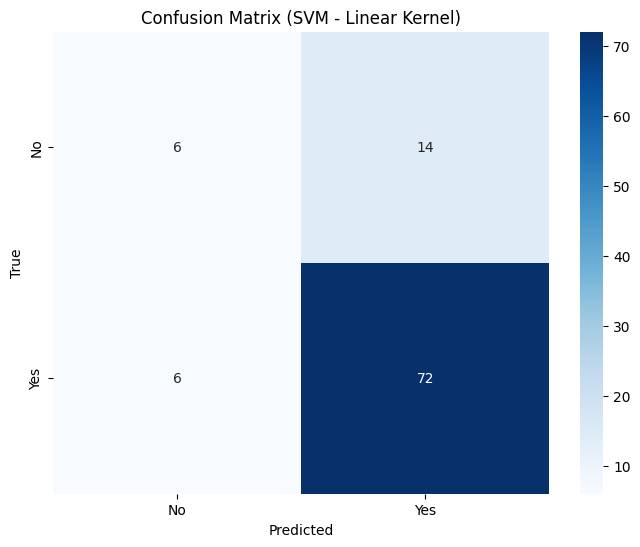


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        20
         yes       0.80      1.00      0.89        78

    accuracy                           0.80        98
   macro avg       0.40      0.50      0.44        98
weighted avg       0.63      0.80      0.71        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


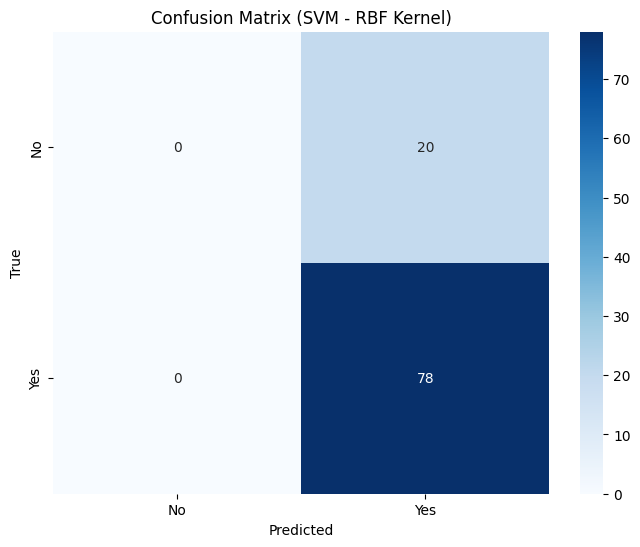


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.40      0.50      0.44        20
         yes       0.86      0.81      0.83        78

    accuracy                           0.74        98
   macro avg       0.63      0.65      0.64        98
weighted avg       0.77      0.74      0.75        98



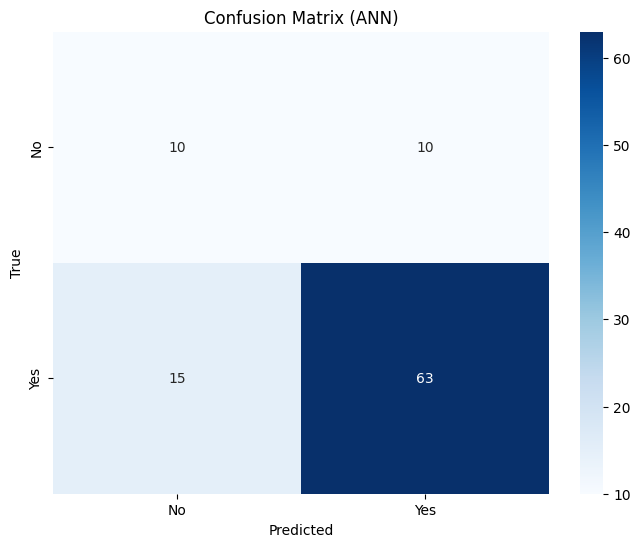

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 500

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
pca_svm = avg_accuracy_svm
pca_svmrbf = avg_accuracy_svm_rbf
pca_ann = avg_accuracy_ann

PCA+SDAE

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
SVM Results (Linear Kernel):
Average Accuracy: 0.737744794887652
Average Precision: 0.8387185184714416
Average Recall: 0.8315806556312886
Average F1 Score: 0.8346688544717749

SVM-RBF Results:
Average Accuracy: 0.7967429396000826
Average Precision: 0.7967429396000826
Average Recall: 1.0
Average F1 Score: 0.8868743615934627

ANN Results:
Average Accuracy: 0.7785817357245929
Average Precision: 0.8485629141127209
Average Recall: 0.880168776371308
Average F1 Score: 0.8636522720715668

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.37      0.50      0.43        20
         yes       0.86      0.78      0.82        78

    accuracy                           0.72        98
   macro avg       0.61      0.64      0.62        98
weighted avg       0.76      0.72      0.74        98



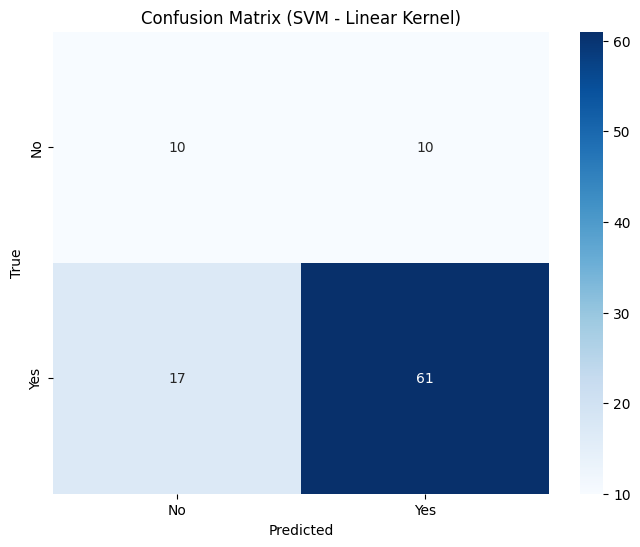


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        20
         yes       0.80      1.00      0.89        78

    accuracy                           0.80        98
   macro avg       0.40      0.50      0.44        98
weighted avg       0.63      0.80      0.71        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


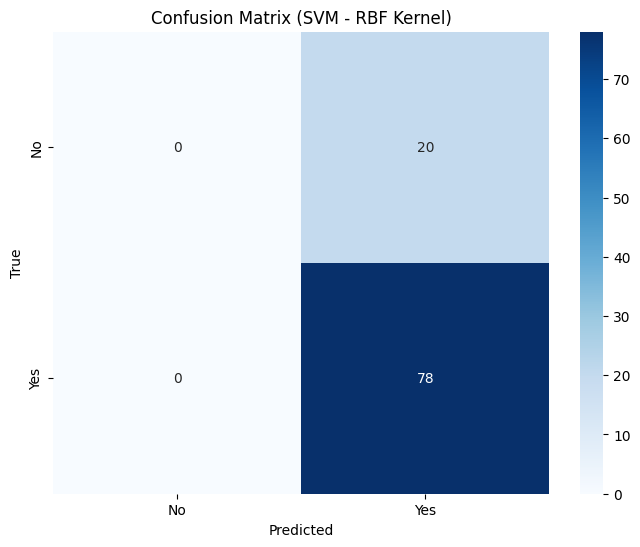


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.55      0.60      0.57        20
         yes       0.89      0.87      0.88        78

    accuracy                           0.82        98
   macro avg       0.72      0.74      0.73        98
weighted avg       0.82      0.82      0.82        98



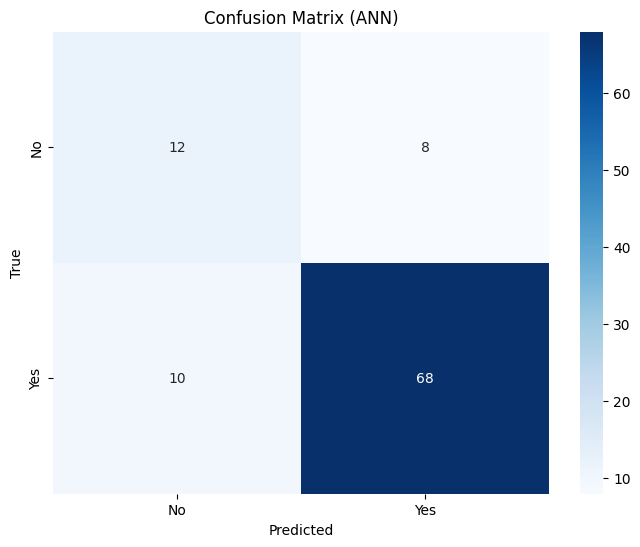

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, GaussianNoise
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 500

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Standardize the features before feeding into the SDAE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train SDAE
sdae = Sequential()
sdae.add(GaussianNoise(0.1, input_shape=(X_scaled.shape[1],)))  # Add Gaussian noise to input
sdae.add(Dense(200, activation='relu'))
sdae.add(GaussianNoise(0.1))
sdae.add(Dense(100, activation='relu'))
sdae.add(Dense(X_scaled.shape[1], activation='linear'))  # Reconstruct to original dimensions

sdae.compile(optimizer='adam', loss='mean_squared_error')

# Train SDAE
sdae.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Transform the input data using the trained SDAE
X_sdae = sdae.predict(X_scaled)

# Perform cross-validation
for train_index, test_index in kf.split(X_sdae, y):
    X_train, X_test = X_sdae[train_index], X_sdae[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
pcasdae_svm = avg_accuracy_svm
pcasdae_svmrbf = avg_accuracy_svm_rbf
pcasdae_ann = avg_accuracy_ann

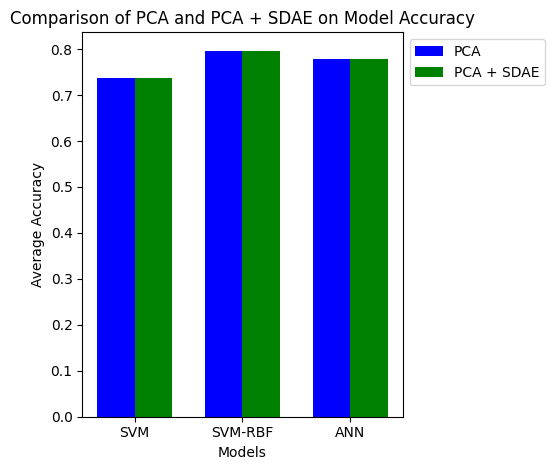

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: accuracy values for PCA and PCA+SDAE for SVM, SVM-RBF, and ANN
pca_svm = avg_accuracy_svm
pca_svmrbf = avg_accuracy_svm_rbf
pca_ann = avg_accuracy_ann

pcasdae_svm = pcasdae_svm
pcasdae_svmrbf = pcasdae_svmrbf
pcasdae_ann = pcasdae_ann

# Labels for models
models = ['SVM', 'SVM-RBF', 'ANN']

# Accuracy values for PCA and PCA+SDAE
pca_accuracies = [pca_svm, pca_svmrbf, pca_ann]
pcasdae_accuracies = [pcasdae_svm, pcasdae_svmrbf, pcasdae_ann]

# Create bar width and position
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots()

bar1 = ax.bar(index, pca_accuracies, bar_width, label='PCA', color='b')
bar2 = ax.bar(index + bar_width, pcasdae_accuracies, bar_width, label='PCA + SDAE', color='g')

# Add labels, title, and ticks
ax.set_xlabel('Models')
ax.set_ylabel('Average Accuracy')
ax.set_title('Comparison of PCA and PCA + SDAE on Model Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to fit the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


# **KPCA**

SVM Results (Linear Kernel):
Average Accuracy: 0.7947021232735519
Average Precision: 0.7963221527286329
Average Recall: 0.9974358974358974
Average F1 Score: 0.8856016343207355

SVM-RBF Results:
Average Accuracy: 0.7967429396000826
Average Precision: 0.7967429396000826
Average Recall: 1.0
Average F1 Score: 0.8868743615934627

ANN Results:
Average Accuracy: 0.8069057926200784
Average Precision: 0.8101790267154417
Average Recall: 0.9898085037325544
Average F1 Score: 0.8909741019214703

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        20
         yes       0.79      0.99      0.88        78

    accuracy                           0.79        98
   macro avg       0.40      0.49      0.44        98
weighted avg       0.63      0.79      0.70        98



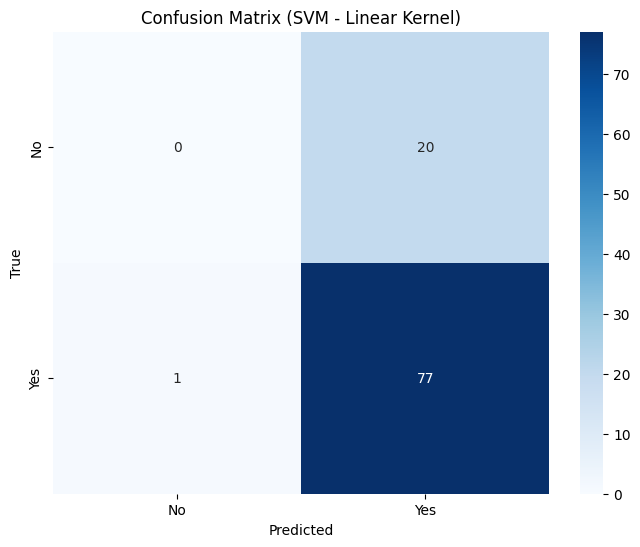


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        20
         yes       0.80      1.00      0.89        78

    accuracy                           0.80        98
   macro avg       0.40      0.50      0.44        98
weighted avg       0.63      0.80      0.71        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


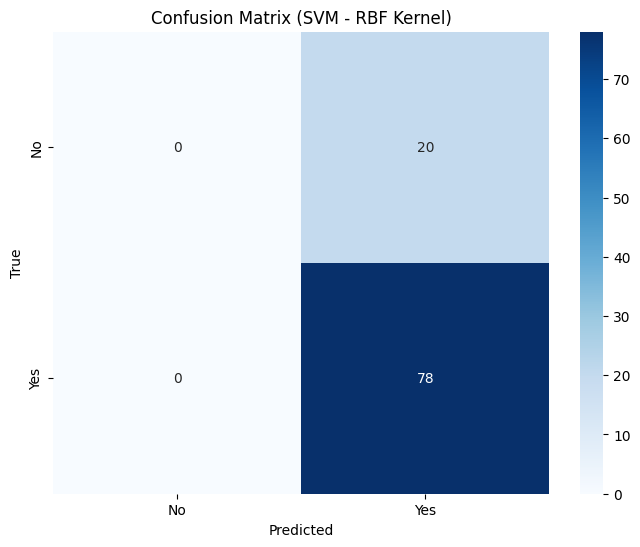


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.80      0.20      0.32        20
         yes       0.83      0.99      0.90        78

    accuracy                           0.83        98
   macro avg       0.81      0.59      0.61        98
weighted avg       0.82      0.83      0.78        98



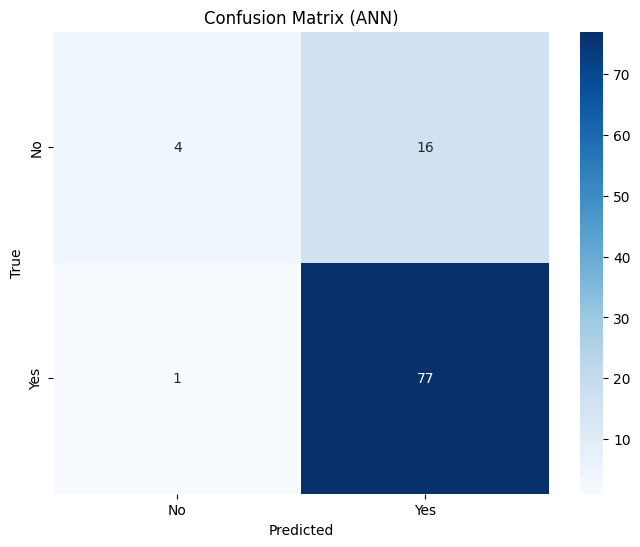

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set KPCA dimension
dim = 500

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply KPCA
    kpca = KernelPCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]), kernel='rbf')  # Using RBF kernel for KPCA
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_kpca, y_train)
    predictions_svm = svm.predict(X_test_kpca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_kpca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_kpca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_kpca, y_train)
    predictions_ann = ann.predict(X_test_kpca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
kpca_svm = avg_accuracy_svm
kpca_svmrbf = avg_accuracy_svm_rbf
kpca_ann = avg_accuracy_ann

# **KPCA+SDAE**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
SVM Results (Linear Kernel):
Average Accuracy: 0.7947021232735519
Average Precision: 0.7975551459259117
Average Recall: 0.9948717948717949
Average F1 Score: 0.8853404013008817

SVM-RBF Results:
Average Accuracy: 0.7967429396000826
Average Precision: 0.7967429396000826
Average Recall: 1.0
Average F1 Score: 0.8868743615934627

ANN Results:
Average Accuracy: 0.7784992784992786
Average Precision: 0.8362778080113458
Average Recall: 0.8979552093476144
Average F1 Score: 0.8658178930885347

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        20
         yes       0.79      0.99      0.88        78

    accuracy                           0.79        98
   macro avg       0.40      0.49      0.44        98
weighted avg       0.63      0.79      0.70        98



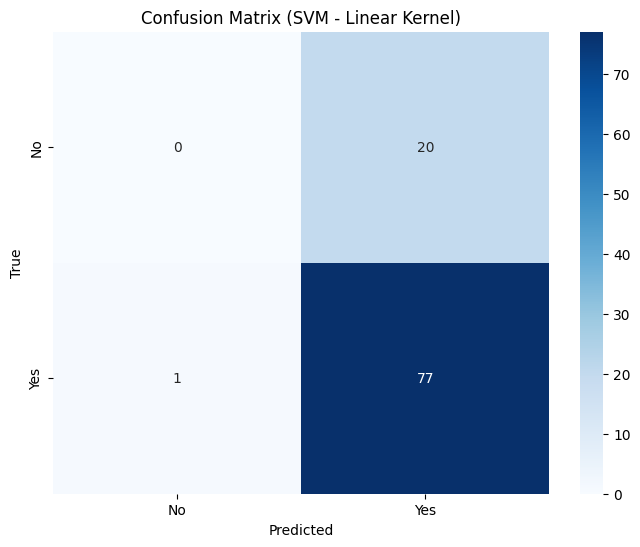


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        20
         yes       0.80      1.00      0.89        78

    accuracy                           0.80        98
   macro avg       0.40      0.50      0.44        98
weighted avg       0.63      0.80      0.71        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


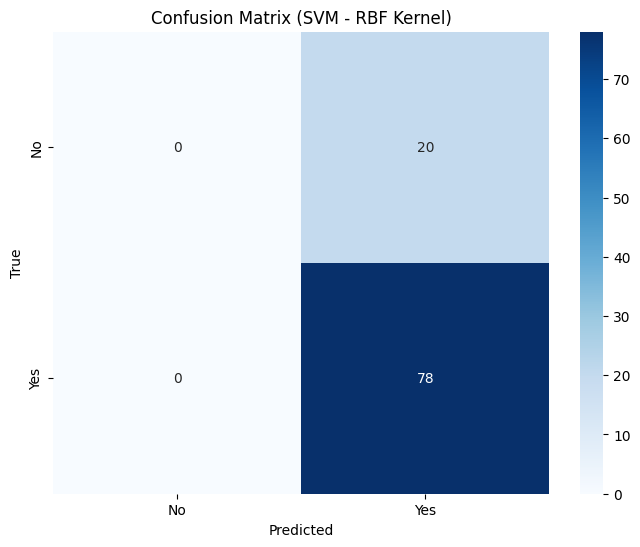


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.44      0.35      0.39        20
         yes       0.84      0.88      0.86        78

    accuracy                           0.78        98
   macro avg       0.64      0.62      0.63        98
weighted avg       0.76      0.78      0.77        98



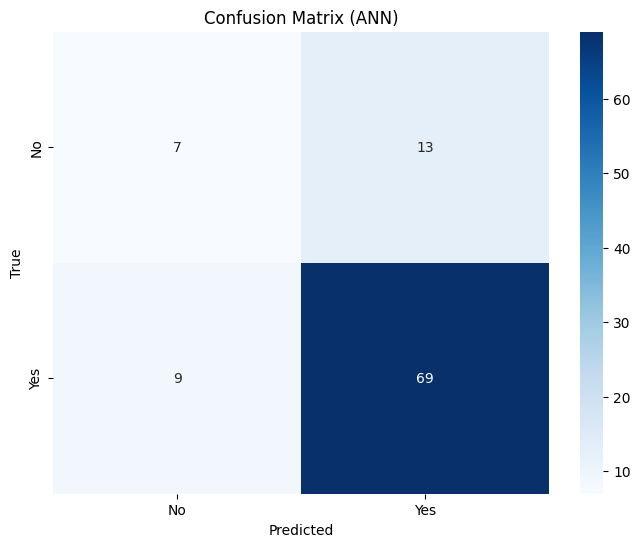

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, GaussianNoise
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set KPCA dimension
dim = 500

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Standardize the features before feeding into the SDAE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train SDAE
sdae = Sequential()
sdae.add(GaussianNoise(0.1, input_shape=(X_scaled.shape[1],)))  # Add Gaussian noise to input
sdae.add(Dense(200, activation='relu'))
sdae.add(GaussianNoise(0.1))
sdae.add(Dense(100, activation='relu'))
sdae.add(Dense(X_scaled.shape[1], activation='linear'))  # Reconstruct to original dimensions

sdae.compile(optimizer='adam', loss='mean_squared_error')

# Train SDAE
sdae.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Transform the input data using the trained SDAE
X_sdae = sdae.predict(X_scaled)

# Perform cross-validation
for train_index, test_index in kf.split(X_sdae, y):
    X_train, X_test = X_sdae[train_index], X_sdae[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Kernel PCA
    kpca = KernelPCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]), kernel='rbf')  # Using RBF kernel
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_kpca, y_train)
    predictions_svm = svm.predict(X_test_kpca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_kpca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_kpca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_kpca, y_train)
    predictions_ann = ann.predict(X_test_kpca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
kpcasdae_svm = avg_accuracy_svm
kpcasdae_svmrbf = avg_accuracy_svm_rbf
kpcasdae_ann = avg_accuracy_ann

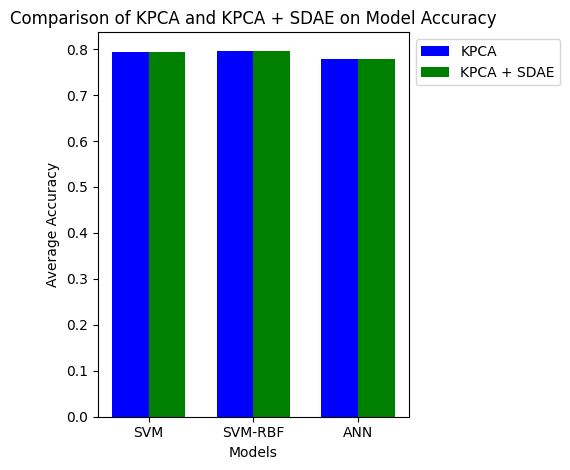

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: accuracy values for KPCA and KPCA+SDAE for SVM, SVM-RBF, and ANN
kpca_svm = avg_accuracy_svm  # Replace with actual accuracy value
kpca_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
kpca_ann = avg_accuracy_ann  # Replace with actual accuracy value

kpcasdae_svm = avg_accuracy_svm  # Replace with actual accuracy value
kpcasdae_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
kpcasdae_ann = avg_accuracy_ann  # Replace with actual accuracy value

# Labels for models
models = ['SVM', 'SVM-RBF', 'ANN']

# Accuracy values for KPCA and KPCA+SDAE
kpca_accuracies = [kpca_svm, kpca_svmrbf, kpca_ann]
kpcasdae_accuracies = [kpcasdae_svm, kpcasdae_svmrbf, kpcasdae_ann]

# Create bar width and position
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots()

bar1 = ax.bar(index, kpca_accuracies, bar_width, label='KPCA', color='b')
bar2 = ax.bar(index + bar_width, kpcasdae_accuracies, bar_width, label='KPCA + SDAE', color='g')

# Add labels, title, and ticks
ax.set_xlabel('Models')
ax.set_ylabel('Average Accuracy')
ax.set_title('Comparison of KPCA and KPCA + SDAE on Model Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to fit the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


# **FS**

SVM Results (Linear Kernel):
Average Accuracy: 0.7885178313749742
Average Precision: 0.839874762610411
Average Recall: 0.9081142486205778
Average F1 Score: 0.872558549731323

SVM-RBF Results:
Average Accuracy: 0.8048649762935478
Average Precision: 0.8151654846335697
Average Recall: 0.9769879909120416
Average F1 Score: 0.8886866002214839

ANN Results:
Average Accuracy: 0.8089259946402804
Average Precision: 0.853097020305313
Average Recall: 0.9183382018825057
Average F1 Score: 0.8843931507510211

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.53      0.40      0.46        20
         yes       0.86      0.91      0.88        78

    accuracy                           0.81        98
   macro avg       0.69      0.66      0.67        98
weighted avg       0.79      0.81      0.80        98



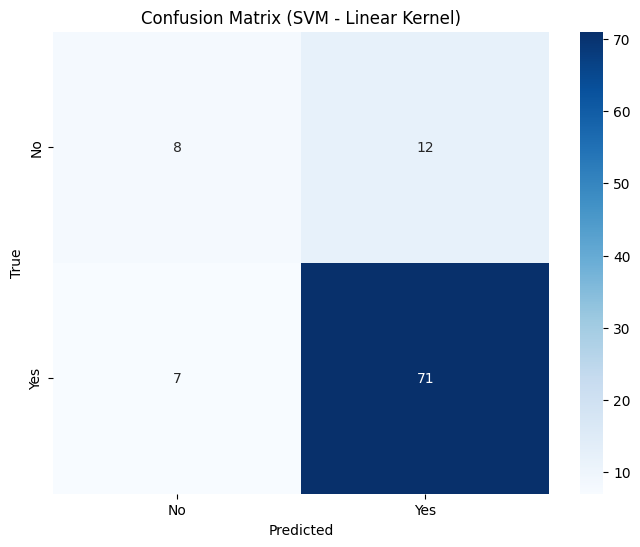


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.75      0.30      0.43        20
         yes       0.84      0.97      0.90        78

    accuracy                           0.84        98
   macro avg       0.80      0.64      0.67        98
weighted avg       0.83      0.84      0.81        98



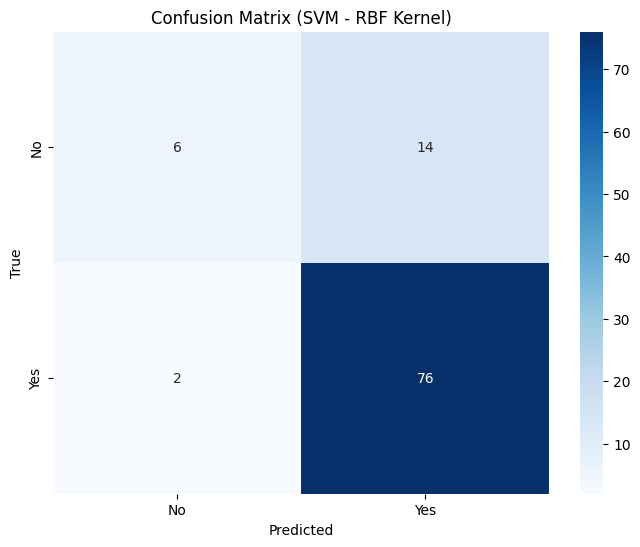


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.60      0.45      0.51        20
         yes       0.87      0.92      0.89        78

    accuracy                           0.83        98
   macro avg       0.73      0.69      0.70        98
weighted avg       0.81      0.83      0.82        98



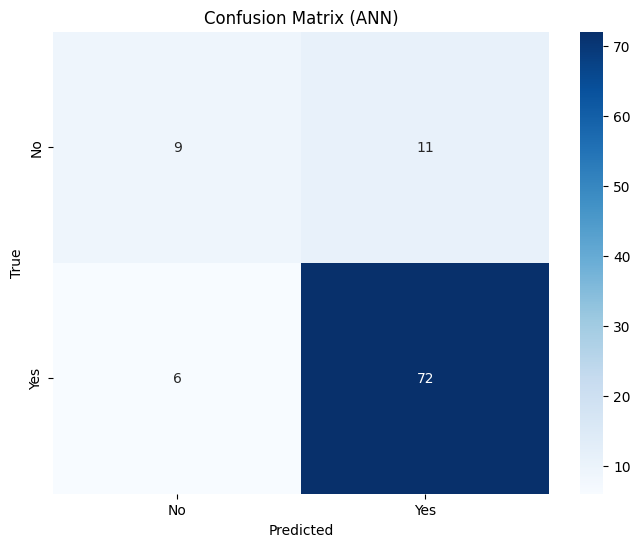

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set the number of top features to select
n_features_to_select = 1000  # Adjust as needed

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Feature Selection
    selector = SelectKBest(score_func=f_classif, k=n_features_to_select)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_selected, y_train)
    predictions_svm = svm.predict(X_test_selected)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_selected, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_selected)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_selected, y_train)
    predictions_ann = ann.predict(X_test_selected)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
fs_svm = avg_accuracy_svm
fs_svmrbf = avg_accuracy_svm_rbf
fs_ann = avg_accuracy_ann

# **FS+SDAE**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
SVM Results (Linear Kernel):
Average Accuracy: 0.7418882704596991
Average Precision: 0.8371995713662379
Average Recall: 0.8393054203180785
Average F1 Score: 0.8380379323824311

SVM-RBF Results:
Average Accuracy: 0.7927025355596784
Average Precision: 0.7996613139895267
Average Recall: 0.9872444011684518
Average F1 Score: 0.883556497459753

ANN Results:
Average Accuracy: 0.8008864151721294
Average Precision: 0.8487107789446557
Average Recall: 0.9133073677377477
Average F1 Score: 0.8797303514656752

Classification Report (SVM - Linear Kernel):
              precision    recall  f1-score   support

          no       0.33      0.40      0.36        20
         yes       0.84      0.79      0.82        78

    accuracy                           0.71        98
   macro avg       0.59      0.60      0.59        98
weighted avg       0.73      0.71      0.72        98



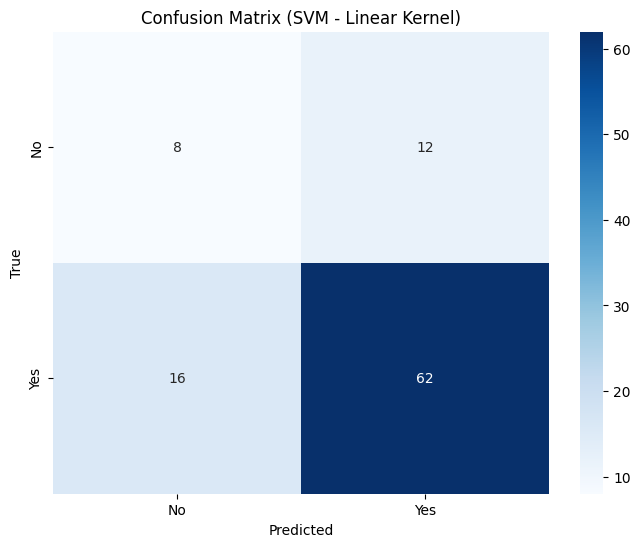


Classification Report (SVM - RBF Kernel):
              precision    recall  f1-score   support

          no       0.50      0.10      0.17        20
         yes       0.81      0.97      0.88        78

    accuracy                           0.80        98
   macro avg       0.65      0.54      0.53        98
weighted avg       0.75      0.80      0.74        98



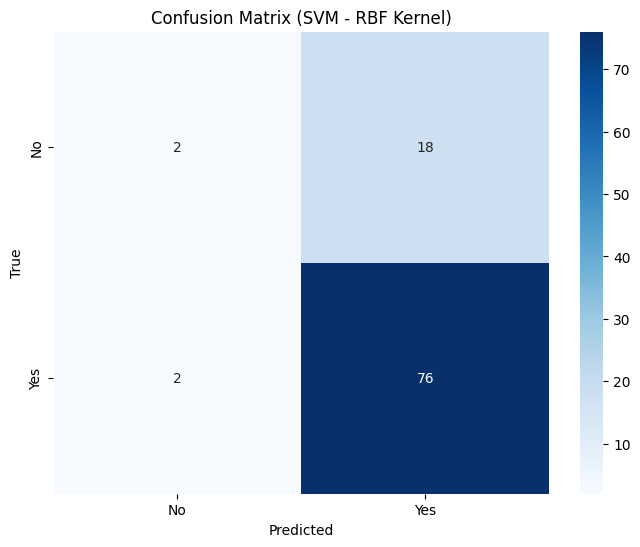


Classification Report (ANN):
              precision    recall  f1-score   support

          no       0.53      0.40      0.46        20
         yes       0.86      0.91      0.88        78

    accuracy                           0.81        98
   macro avg       0.69      0.66      0.67        98
weighted avg       0.79      0.81      0.80        98



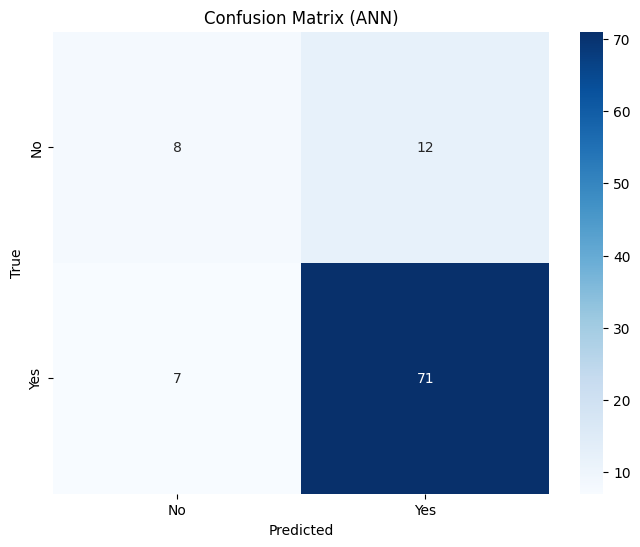

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif  # Import SelectKBest for feature selection
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, GaussianNoise
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize metrics storage
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set number of features to select
n_features_to_select = 1000  # Set this to the desired number of features

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Standardize the features before feeding into the SDAE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train SDAE
sdae = Sequential()
sdae.add(GaussianNoise(0.1, input_shape=(X_scaled.shape[1],)))  # Add Gaussian noise to input
sdae.add(Dense(200, activation='relu'))
sdae.add(GaussianNoise(0.1))
sdae.add(Dense(100, activation='relu'))
sdae.add(Dense(X_scaled.shape[1], activation='linear'))  # Reconstruct to original dimensions

sdae.compile(optimizer='adam', loss='mean_squared_error')

# Train SDAE
sdae.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Transform the input data using the trained SDAE
X_sdae = sdae.predict(X_scaled)

# Perform cross-validation
for train_index, test_index in kf.split(X_sdae, y):
    X_train, X_test = X_sdae[train_index], X_sdae[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply feature selection
    selector = SelectKBest(score_func=f_classif, k=n_features_to_select)  # Using ANOVA F-value as the scoring function
    X_train_fs = selector.fit_transform(X_train, y_train)
    X_test_fs = selector.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_fs, y_train)
    predictions_svm = svm.predict(X_test_fs)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_fs, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_fs)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_fs, y_train)
    predictions_ann = ann.predict(X_test_fs)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

# Generate classification report and confusion matrix for the last fold
# For SVM (Linear Kernel)
print("\nClassification Report (SVM - Linear Kernel):")
print(classification_report(y_test, predictions_svm))

cf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM (RBF Kernel)
print("\nClassification Report (SVM - RBF Kernel):")
print(classification_report(y_test, predictions_svm_rbf))

cf_matrix_svm_rbf = confusion_matrix(y_test, predictions_svm_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (SVM - RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, predictions_ann))

cf_matrix_ann = confusion_matrix(y_test, predictions_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
fssdae_svm = avg_accuracy_svm
fssdae_svmrbf = avg_accuracy_svm_rbf
fssdae_ann = avg_accuracy_ann

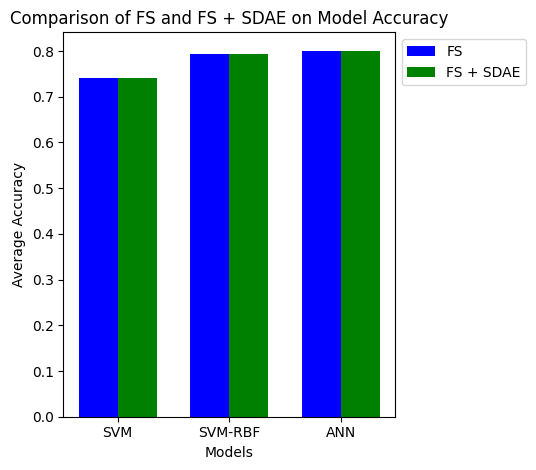

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: accuracy values for FS and FS+SDAE for SVM, SVM-RBF, and ANN
fs_svm = avg_accuracy_svm  # Replace with actual accuracy value
fs_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
fs_ann = avg_accuracy_ann  # Replace with actual accuracy value

fssdae_svm = avg_accuracy_svm  # Replace with actual accuracy value
fssdae_svmrbf = avg_accuracy_svm_rbf  # Replace with actual accuracy value
fssdae_ann = avg_accuracy_ann  # Replace with actual accuracy value

# Labels for models
models = ['SVM', 'SVM-RBF', 'ANN']

# Accuracy values for FS and FS+SDAE
fs_accuracies = [fs_svm, fs_svmrbf, fs_ann]
fssdae_accuracies = [fssdae_svm, fssdae_svmrbf, fssdae_ann]

# Create bar width and position
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots()

bar1 = ax.bar(index, fs_accuracies, bar_width, label='FS', color='b')
bar2 = ax.bar(index + bar_width, fssdae_accuracies, bar_width, label='FS + SDAE', color='g')

# Add labels, title, and ticks
ax.set_xlabel('Models')
ax.set_ylabel('Average Accuracy')
ax.set_title('Comparison of FS and FS + SDAE on Model Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to fit the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


In [ ]:
from tabulate import tabulate

# Convert accuracies to percentage
def format_percentage(accuracy):
    return f'{accuracy * 100:.2f}%'

# Define the accuracies and models
data = [
    ['PCA', format_percentage(pca_svm), format_percentage(pca_svmrbf), format_percentage(pca_ann)],
    ['KPCA', format_percentage(kpca_svm), format_percentage(kpca_svmrbf), format_percentage(kpca_ann)],
    ['RP+PCA', format_percentage(rppca_svm), format_percentage(rppca_svmrbf), format_percentage(rppca_ann)],
    ['SDAE', format_percentage(sdae_svm), format_percentage(sdae_svmrbf), format_percentage(sdae_ann)],
    ['RP+SDAE', format_percentage(rpsdae_svm), format_percentage(rpsdae_svmrbf), format_percentage(rpsdae_ann)],
    ['FS+SDAE', format_percentage(fssdae_svm), format_percentage(fssdae_svmrbf), format_percentage(fssdae_ann)]
]

headers = ['Model', 'SVM', 'SVM-RBF', 'ANN']

# Print the table
print(tabulate(data, headers=headers, tablefmt='grid'))


+---------+--------+-----------+--------+
| Model   | SVM    | SVM-RBF   | ANN    |
+=========+========+===========+========+
| PCA     | 81.50% | 79.47%    | 77.23% |
+---------+--------+-----------+--------+
| KPCA    | 79.47% | 79.67%    | 80.69% |
+---------+--------+-----------+--------+
| RP+PCA  | 72.97% | 79.67%    | 70.34% |
+---------+--------+-----------+--------+
| SDAE    | 70.13% | 79.88%    | 71.56% |
+---------+--------+-----------+--------+
| RP+SDAE | 70.13% | 79.88%    | 71.56% |
+---------+--------+-----------+--------+
| FS+SDAE | 79.88% | 79.67%    | 79.88% |
+---------+--------+-----------+--------+


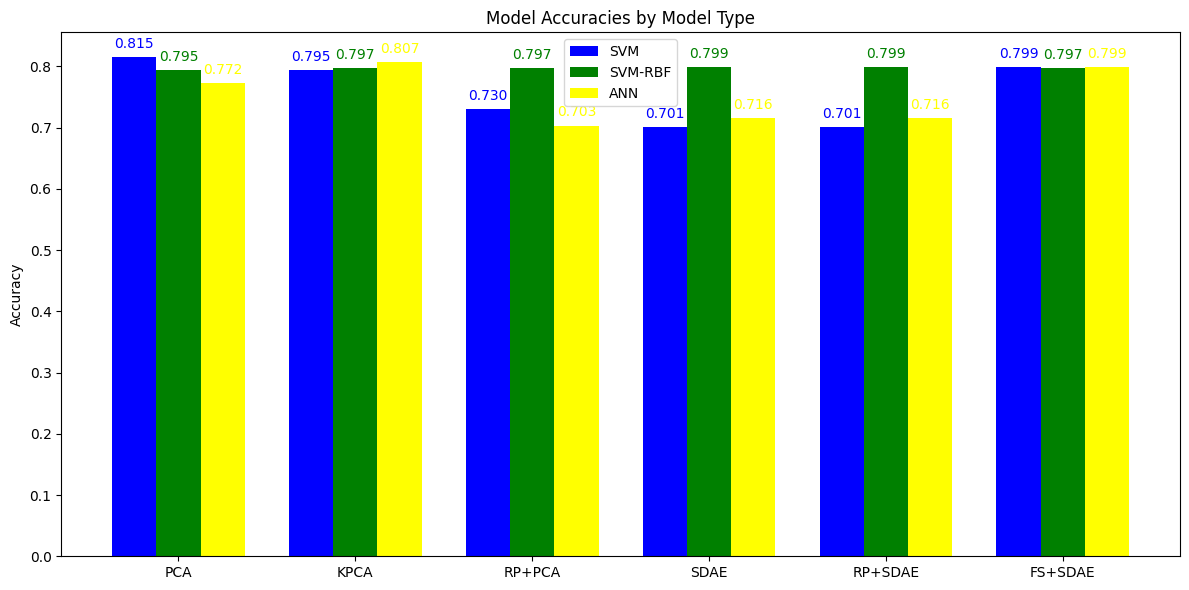

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables with accuracies
accuracies_svm = [pca_svm, kpca_svm, rppca_svm, sdae_svm, rpsdae_svm, fssdae_svm]
accuracies_svm_rbf = [pca_svmrbf, kpca_svmrbf, rppca_svmrbf, sdae_svmrbf, rpsdae_svmrbf, fssdae_svmrbf]
accuracies_ann = [pca_ann, kpca_ann, rppca_ann, sdae_ann, rpsdae_ann, fssdae_ann]

# Define the corresponding model names
models = ['PCA', 'KPCA', 'RP+PCA', 'SDAE', 'RP+SDAE', 'FS+SDAE']

# Create a bar plot with different colors for SVM, SVM-RBF, and ANN
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, accuracies_svm, bar_width, label='SVM', color='blue')
plt.bar(index, accuracies_svm_rbf, bar_width, label='SVM-RBF', color='green')
plt.bar(index + bar_width, accuracies_ann, bar_width, label='ANN', color='yellow')

plt.xticks(index, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracies by Model Type')

# Add accuracy values on top of the bars
for i, value in enumerate(accuracies_svm):
    plt.text(i - bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='blue')

for i, value in enumerate(accuracies_svm_rbf):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='green')

for i, value in enumerate(accuracies_ann):
    plt.text(i + bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='yellow')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
